In [92]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import e
connection = sqlite3.connect('file:database.db?mode=ro', uri=True)

market_orders = pd.read_sql_query("SELECT * FROM market_orders", connection)
market_history = pd.read_sql_query("SELECT * FROM market_history", connection)

market_history = market_history.sort_values(by=['date'])

connection.close()

In [97]:
item_34 = market_history.loc[market_history['item_id'] == 30747]
item_34 = market_history.loc[market_history['region_id'] == 10000002]

item_34

,id,date,item_id,region_id,low_price,high_price,average_price,order_count,volume,entropy
0,1,2022-09-01,18,10000002,39.0,39.0,39.00,73,7995819,0.008568
1214509,1214510,2022-09-01,17330,10000002,5000000.0,5995000.0,5597000.00,5,5,0.010131
1215249,1215250,2022-09-01,17332,10000002,5000000.0,5500000.0,5454545.45,2,11,0.013326
4463907,4463908,2022-09-01,58904,10000002,40040000.0,45660000.0,43690869.57,4,23,0.007518
4464419,4464420,2022-09-01,58919,10000002,23780.0,23780.0,23780.00,114,253,0.004406
...,...,...,...,...,...,...,...,...,...,...
2468198,2468199,2023-10-02,28421,10000002,2115.0,2115.0,2115.00,2,6841,0.010558
1731800,1731801,2023-10-02,22456,10000002,51230000.0,51260000.0,51240000.00,66,106,0.009246
1247873,1247874,2023-10-02,17619,10000002,9376000.0,9376000.0,9376000.00,86,170,0.006946
778143,778144,2023-10-02,11278,10000002,2500000.0,2699000.0,2599500.00,2,2,0.017354


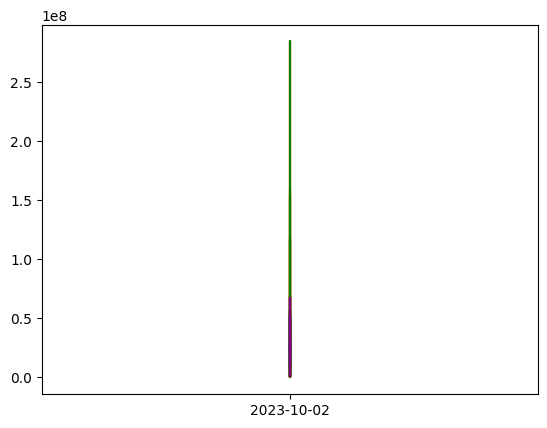

In [94]:
last_30_days = item_34.tail(30)
rolling_7 = item_34['average_price'].rolling(7).mean().tail(30)
rolling_30 = item_34['average_price'].rolling(7).mean().tail(30)

plt.figure()
plt.plot(last_30_days['date'], last_30_days['average_price'], label='average_price', color='orange')
plt.plot(last_30_days['date'], last_30_days['low_price'], label='average_price', color='red')
plt.plot(last_30_days['date'], last_30_days['high_price'], label='average_price', color='green')
plt.plot(last_30_days['date'], rolling_7, label='average_price', color='blue')
plt.plot(last_30_days['date'], rolling_30, label='average_price', color='purple')

plt.fill_between(last_30_days['date'], last_30_days['low_price'], last_30_days['high_price'], alpha=0.2)

plt.show()

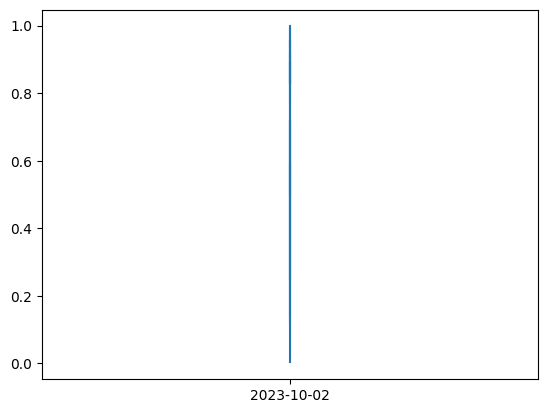

In [95]:
last_30_days = item_34.tail(30)
difference = last_30_days['high_price'] - last_30_days['low_price']
relative_to_low = last_30_days['average_price'] - last_30_days['low_price']
relative = relative_to_low / difference
plt.figure()

# plt.plot(last_30_days['date'], difference, label='average_price')
plt.plot(last_30_days['date'], relative, label='average_price')

plt.show()

In [96]:
g_sum = market_history.groupby('item_id')['average_price'].transform('sum')
values = market_history['average_price'] / g_sum
market_history['entropy'] = -(values*np.log(values))
market_history['entropy'] = market_history['entropy'].fillna(0)
df = market_history.groupby('item_id')['entropy'].sum()
df = df.sort_values(ascending=False)
df

item_id
30747    6.672033
30746    6.672033
30745    6.672033
30744    6.672033
60771    6.672033
           ...   
53205    0.000000
37485    0.000000
36288    0.000000
36289    0.000000
40332    0.000000
Name: entropy, Length: 14849, dtype: float64